## Case Study: Stock Price Prediction 


<h4> The Case study is to predict Next day stock price [Adj Close Price] using  regression analysis</h4>
<p>
    We will be using Nifty 50 data for this case study<br>
    The filename '^NSEI.csv' contains the data<br>
    You need to generate  technical indicators as given below as  Features for converting Time Series to Supervised Learning Problem <br>
   <a href='https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/'> Convert time Series to Supervised Learning</a><p>
    <ul>
        <li> Moving Averages (Example Given : 3Period Moving Avearage (3MA)) </li>
        <li> Previous Day Returns </li>
        <li> Relative Stock returns </li>
    </ul>
<br>
Then you need to Train a Supervised learning algorithm and perform prediction.<br>
<a href='https://blog.quantinsti.com/random-forest-algorithm-in-python/'>Example for your Refrence </a><br>
<b> Make sure  to shift the feature by 1 period so that you will have data from t-1 period to predict price at t (look ahead bias) </b>

<strong> Please consider Testing Period after  01-01-2019 </strong>
</p>
<p>
    <b> Metrics for Evaluation </b>
    <ul>
        <li><strong> RMSE </strong></li>
     </ul>
</p>
<p> Some additional Documention for your help
    <ul>
        <li><a href='https://pandas.pydata.org/docs/'> Pandas Documentation </a> </li>
        <li><a href='https://scikit-learn.org/stable/'> Scikit Learn </a></li>
        </ul>
        </p>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
##### Import Other Required Library ###########
import matplotlib.pyplot as plt
%matplotlib inline
sn.set() #fija el formato de seaborn para las figuras
from datetime import datetime
from sklearn.model_selection import train_test_split

In [3]:
# Reading the Stock 
df=pd.read_csv("^NSEI.csv")

In [4]:
# Getting the head of the data
df.head()

Date         Open         High          Low        Close  \
0  2007-09-17  4518.450195  4549.049805  4482.850098  4494.649902   
1  2007-09-18  4494.100098  4551.799805  4481.549805  4546.200195   
2  2007-09-19  4550.250000  4739.000000  4550.250000  4732.350098   
3  2007-09-20  4734.850098  4760.850098  4721.149902  4747.549805   
4  2007-09-21  4752.950195  4855.700195  4733.700195  4837.549805   

     Adj Close  Volume  
0  4494.649902     0.0  
1  4546.200195     0.0  
2  4732.350098     0.0  
3  4747.549805     0.0  
4  4837.549805     0.0

In [5]:
# Selecting Adj Close
df=df[['Date','Adj Close']]

In [6]:
df.head()

Date    Adj Close
0  2007-09-17  4494.649902
1  2007-09-18  4546.200195
2  2007-09-19  4732.350098
3  2007-09-20  4747.549805
4  2007-09-21  4837.549805

In [7]:
df.describe()

Adj Close
count   3039.000000
mean    7201.282316
std     2468.447937
min     2524.199951
25%     5261.425049
50%     6187.250000
75%     8826.625000
max    12362.299805

In [8]:
print(df.isnull().sum())

Date          0
Adj Close    32
dtype: int64


In [9]:
df_1=df

In [10]:
df_1.dropna() 

Date     Adj Close
0     2007-09-17   4494.649902
1     2007-09-18   4546.200195
2     2007-09-19   4732.350098
3     2007-09-20   4747.549805
4     2007-09-21   4837.549805
...          ...           ...
3066  2020-02-20  12080.849609
3067  2020-02-24  11829.400391
3068  2020-02-25  11797.900391
3069  2020-02-26  11678.500000
3070  2020-02-27  11633.299805

[3039 rows x 2 columns]

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3071 non-null   object 
 1   Adj Close  3039 non-null   float64
dtypes: float64(1), object(1)
memory usage: 48.1+ KB


In [12]:
df_1['Date']=pd.to_datetime(df_1['Date'])

In [13]:
print(df_1.dtypes)

Date         datetime64[ns]
Adj Close           float64
dtype: object


In [14]:
df_1.set_index('Date', inplace=True)

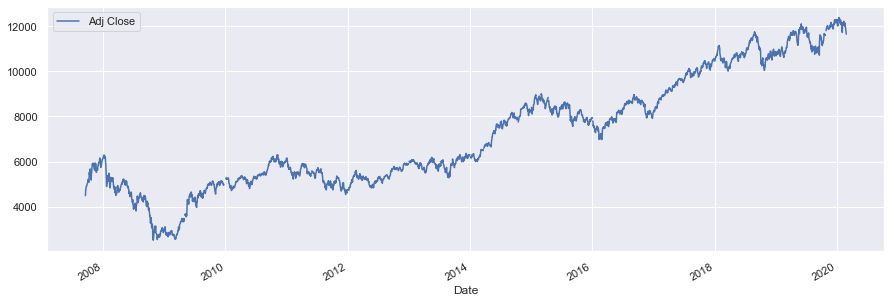

In [15]:
df_1.plot(grid=True, figsize=(15,5))

In [16]:
df_1.sort_values(by='Date')

Adj Close
Date                    
2007-09-17   4494.649902
2007-09-18   4546.200195
2007-09-19   4732.350098
2007-09-20   4747.549805
2007-09-21   4837.549805
...                  ...
2020-02-20  12080.849609
2020-02-24  11829.400391
2020-02-25  11797.900391
2020-02-26  11678.500000
2020-02-27  11633.299805

[3071 rows x 1 columns]

In [17]:
#### Generating a Sample Feature for your Reference 3period moving average
df_1['3MA']=df_1['Adj Close'].rolling(3).mean()
### shifting Feature 3MA  so that features at t-1 will be used to predict close at t
df_1['3MA']=df_1['3MA'].shift(1)

In [18]:
df_1['5MA']=df_1['Adj Close'].rolling(5).mean()
### shifting Feature 5MA  so that features at t-1 will be used to predict close at t
df_1['5MA']=df_1['5MA'].shift(5)

In [19]:
# Creating lagged variables t-1, ..., t-7 to predict close at t
df_1['Lag_1']=df_1['Adj Close'].shift(1)
df_1['Lag_2']=df_1['Adj Close'].shift(2)
df_1['Lag_3']=df_1['Adj Close'].shift(3)
df_1['Lag_4']=df_1['Adj Close'].shift(4)
df_1['Lag_5']=df_1['Adj Close'].shift(5)
df_1['Lag_6']=df_1['Adj Close'].shift(6)
df_1['Lag_7']=df_1['Adj Close'].shift(7)


In [20]:
df_1.head()

Adj Close          3MA  5MA        Lag_1        Lag_2  \
Date                                                                  
2007-09-17  4494.649902          NaN  NaN          NaN          NaN   
2007-09-18  4546.200195          NaN  NaN  4494.649902          NaN   
2007-09-19  4732.350098          NaN  NaN  4546.200195  4494.649902   
2007-09-20  4747.549805  4591.066732  NaN  4732.350098  4546.200195   
2007-09-21  4837.549805  4675.366699  NaN  4747.549805  4732.350098   

                  Lag_3        Lag_4  Lag_5  Lag_6  Lag_7  
Date                                                       
2007-09-17          NaN          NaN    NaN    NaN    NaN  
2007-09-18          NaN          NaN    NaN    NaN    NaN  
2007-09-19          NaN          NaN    NaN    NaN    NaN  
2007-09-20  4494.649902          NaN    NaN    NaN    NaN  
2007-09-21  4546.200195  4494.649902    NaN    NaN    NaN

In [21]:
# Development data
df_development = df_1['2007':'2018']
df_development.head()
df_development = df_development.dropna()

# Testing data
df_testing = df_1['2019':'2020']
df_testing.head()
df_testing = df_testing.dropna()

In [22]:
# Train Test Split  data (Make sure to consider the data is a time series data)
# We now split the dataset into 75% Training dataset and 25% for Testing dataset
Y = df_development[['Adj Close']]
X = df_development.iloc[:, 1:9]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)
print('Training X Shape:', X_train.shape)
print('Training Y Shape:', Y_train.shape)
print('Testing X Shape:', Y_test.shape)
print('Testing Y Shape:', Y_test.shape)

Training X Shape: (1893, 8)
Training Y Shape: (1893, 1)
Testing X Shape: (632, 1)
Testing Y Shape: (632, 1)


In [23]:
# Train different Algorithms
# Random Forest regression
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=5)
model_forest = forest.fit(X_train, Y_train.values.ravel())

# Linear regression
from sklearn import linear_model

linear = linear_model.LinearRegression()
linear.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Test performance of the model on the Development Testing Data using RMSE
import math 

predictions_forest = forest.predict(X_test)
errors_forest = (predictions_forest - Y_test.values)**2
RMSE_forest = round(math.sqrt(np.mean(errors_forest)), 1)
print('Random Forest RMSE:', RMSE_forest)

predictions_linear = linear.predict(X_test)
errors_linear = (predictions_linear - Y_test.values)**2
RMSE_linear = round(math.sqrt(np.mean(errors_linear)), 1)
print('Linear Regression RMSE:', RMSE_linear)

Random Forest RMSE: 3071.8
Linear Regression RMSE: 76.0


In [26]:
# Test performance model on the Testing Data (01-01-2019 onwards) using RMSE
Y_perf = df_testing[['Adj Close']]
X_perf = df_testing.iloc[:, 1:9]

predictions_forest = forest.predict(X_perf)
errors_forest = (predictions_forest - Y_perf.values)**2
RMSE_forest = round(math.sqrt(np.mean(errors_forest)), 1)
print('Random Forest RMSE:', RMSE_forest)

predictions_linear = linear.predict(X_perf)
errors_linear = (predictions_linear - Y_perf.values)**2
RMSE_linear = round(math.sqrt(np.mean(errors_linear)), 1)
print('Linear Regression RMSE:', RMSE_linear)

Random Forest RMSE: 605.7
Linear Regression RMSE: 101.7
